# Explore here

In [22]:
# Your code here
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

#Download and load the dataset into a Dataframe
# Cargar el archivo descargado en un DataFrame de pandas
total_data = pd.read_csv(url)

# Save the DataFrame to a local CSV file in the '../data/raw/' directory
total_data.to_csv('../data/raw/sales.csv', index=False)
print(f"Archivo descargado y guardado exitosamente en: data/raw/sales.csv \n")
print(total_data.head())


Archivo descargado y guardado exitosamente en: data/raw/sales.csv 

                         date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633


Como se puede observar ya es una serie temporal con dos dimensiones

In [23]:
total_data["date"] = pd.to_datetime(total_data["date"])
total_data = total_data.set_index("date")
total_data.head

<bound method NDFrame.head of                                   sales
date                                   
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
...                                 ...
2023-08-30 17:10:08.079328   989.600354
2023-08-31 17:10:08.079328   994.987326
2023-09-01 17:10:08.079328   995.814415
2023-09-02 17:10:08.079328   997.350214
2023-09-03 17:10:08.079328  1000.482785

[366 rows x 1 columns]>

Se asegura que la columna time sea datetime (para manipular fechas) y establecer la columan date como indice.


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


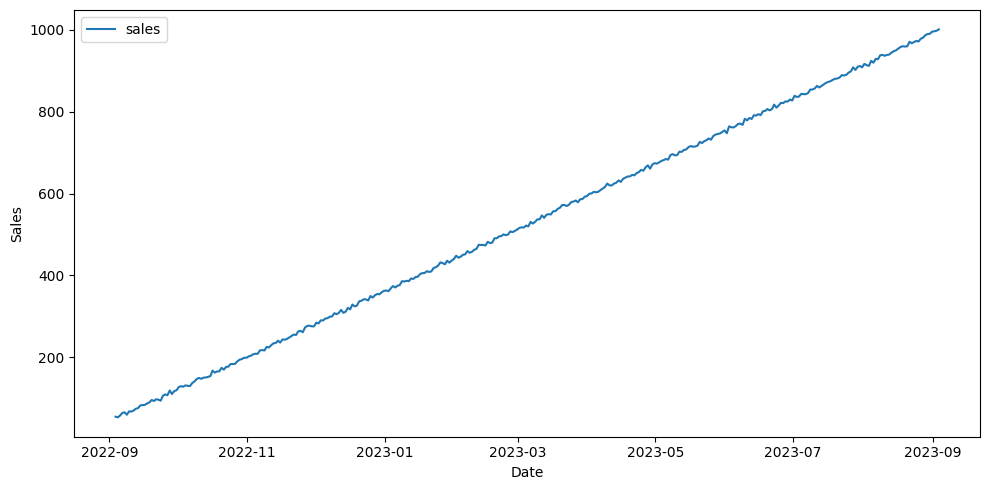

In [26]:
#visualizar la serie temporal
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))
# Añadir nombres a los ejes
plt.xlabel("Date")  # Eje X
plt.ylabel("Sales") #Eje y
#Gráfico de lineas
sns.lineplot(data = total_data)
# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()



Se observa una tendencia creciente y bastante lineal en las ventás a medida que pasa el tiempo

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

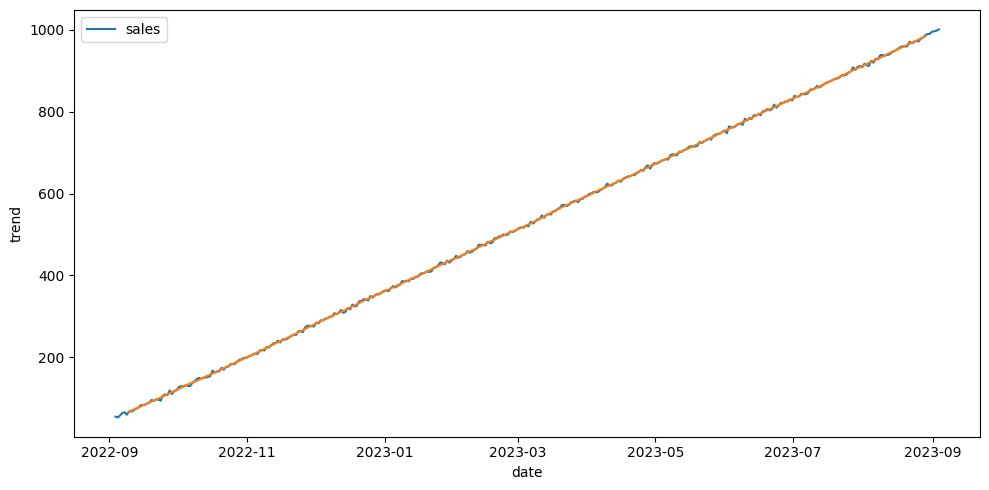

In [28]:
decomposition = seasonal_decompose(total_data, period = 12)

#Análisis de la tendencia
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Se confirma lo observado: una clara tendencia positiva a lo largo de los años

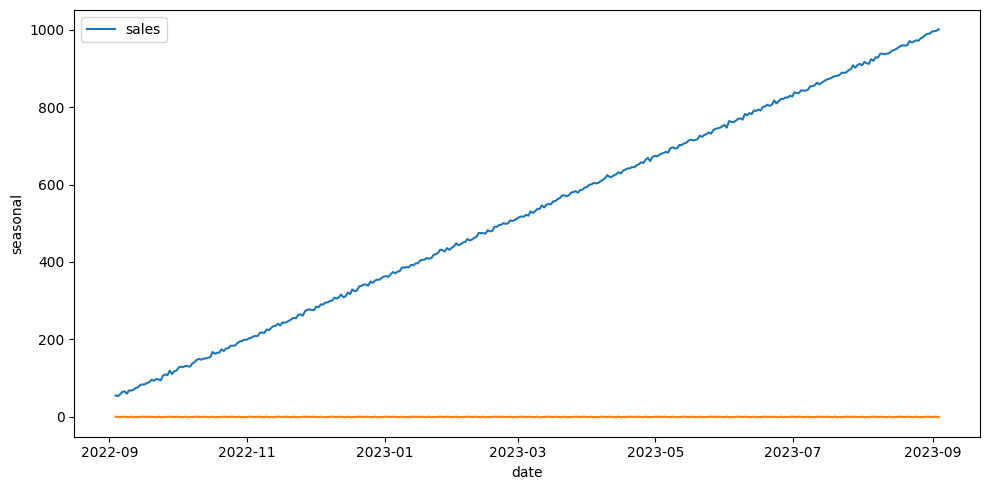

In [6]:
#Análisis de la estacionalidad
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

Para evaluar la estacionalidad de la serie temporal podemos aplicar la llamada Prueba de Dickey-Fuller (Dickey-Fuller test), que es un contraste de hipótesis en el que la hipótesis nula es que la serie es estacionaria, y la alternativa, que es no estacionaria

In [29]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Aquí podemos ver que el p-value es mayor a 0.05, esto significa que nuestra hipótesis nula será rechazada y tomaremos esta serie como no estacionaria

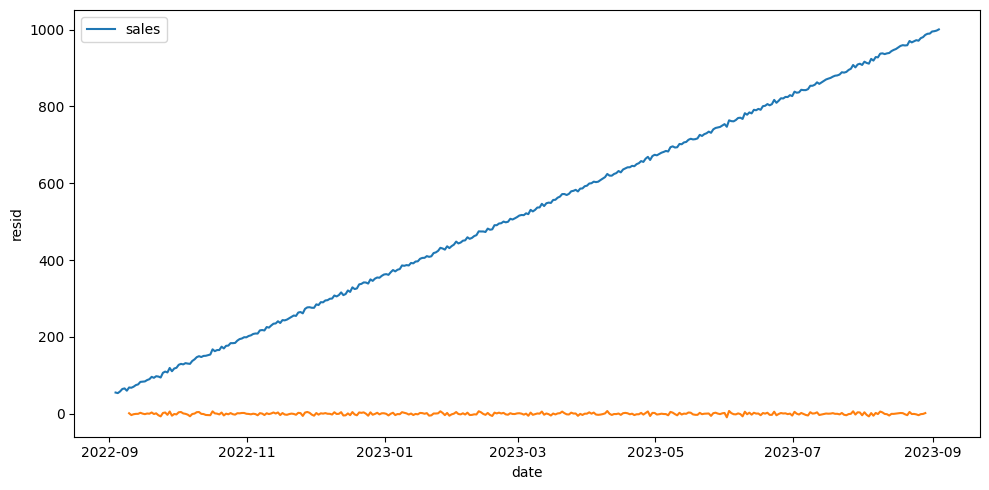

In [30]:
#Analisis de la variabilidad 
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()


No se observa a penas ruido, el poco que hay es bastante constante

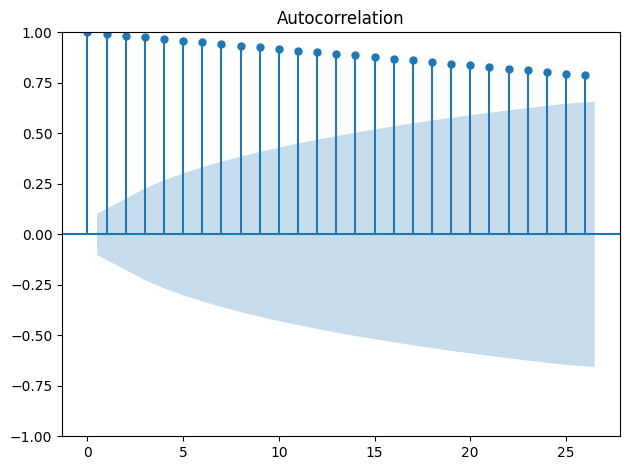

In [31]:
#Analisis de la autocorrelacion
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(total_data)

plt.tight_layout()

plt.show()

Este gráfico nos ayuda a ver si los valores en la serie de tiempo están correlacionados con los valores anteriores.
Se aprecia una alta correlación entre los puntos y sus copias retrasadas, que disminuye a lo largo del tiempo.

# Modelo ARIMA 

In [34]:
#hacer los datos estacionarios
total_data_stationary = total_data.diff().dropna()

test_stationarity(total_data_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

Ahora la serie si que lo es, y podemos aplicar el método ARIMA automático

In [46]:
from pmdarima import auto_arima

model = auto_arima(total_data_stationary, seasonal = True, trace = True, m = 12)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [37]:
model.summary()

NameError: name 'model' is not defined

In [38]:
forecast = model.predict(10) #siguientes 10 dias
forecast

NameError: name 'model' is not defined

NameError: name 'df_stationary' is not defined

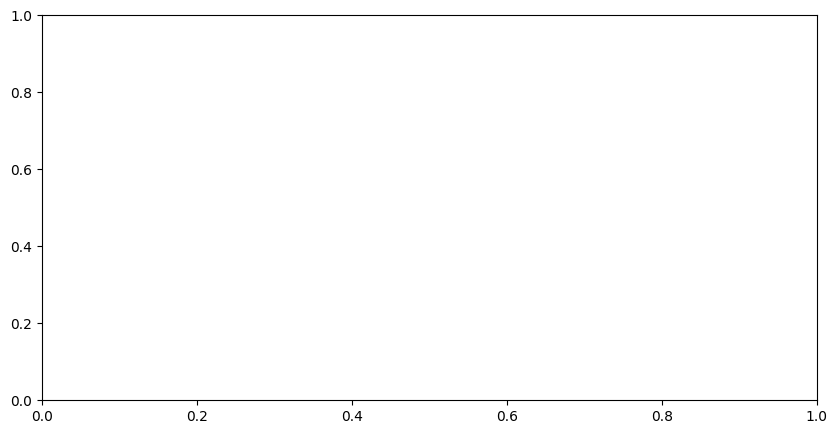

In [39]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()